In [17]:
import torch

In [18]:
torch.cuda.is_available()

True

In [3]:
# !git clone https://github.com/sarangkartikey50/Air-Quality-Prediction.git

Cloning into 'Air-Quality-Prediction'...
remote: Enumerating objects: 114, done.
remote: Total 114 (delta 0), reused 0 (delta 0), pack-reused 114
Receiving objects: 100% (114/114), 5.35 MiB | 6.74 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [3]:
cd Air-Quality-Prediction/

d:\iTek-workshop\Air-Quality-Prediction


In [14]:
!python arima_no2.py

Please wait. Importing data...
/mnt/c/Users/deepe/iTek-workshop/Air-Quality-Prediction/arima_no2.py:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding = "ISO-8859-1")
import completed.
/mnt/c/Users/deepe/iTek-workshop/Air-Quality-Prediction/arima_no2.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data_no2['no2'] = delhi_data_no2['no2'].map(lambda x: str(x))
date
1987-01-01    20.050000
1987-02-01    18.566667
1987-03-01    18.044444
1987-04-01    14.600000
1987-05-01          NaN
                ...    
2015-08-01    52.372881
2015-09-01    54.774194
2015-10-01    70.081967
2015-11-01    93.474576
2015-12-01    94.140625
Freq: MS, Name: no2, L

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('data.csv', encoding = "ISO-8859-1")

C:\Users\deepe\AppData\Local\Temp\ipykernel_59128\3061131147.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('data.csv', encoding = "ISO-8859-1")


In [4]:
display(dataset.head())

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
import datetime

In [6]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas 
import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [7]:

plt.style.use('fivethirtyeight')

color = sns.color_palette()
print('Please wait. Importing data...')
df = pd.read_csv("data.csv", encoding = "ISO-8859-1", low_memory=False)
print('import completed.')

Please wait. Importing data...
import completed.


In [8]:

def date_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')


In [9]:
delhi_data = df[df.state == 'Delhi'].sort_values(by='date', ascending=0)
delhi_data_no2 = delhi_data[['date', 'no2']]
delhi_data_no2['no2'] = delhi_data_no2['no2'].map(lambda x: str(x))
delhi_data_no2 = delhi_data_no2[delhi_data_no2.no2 != 'nan']
delhi_data_no2['no2'] = pd.to_numeric(delhi_data_no2['no2'])
delhi_data_no2['date'] = delhi_data_no2['date'].map(lambda x: str(x)[:10])
delhi_data_no2['date'] = delhi_data_no2['date'].map(lambda x: date_parser(x))
delhi_data_no2.index = delhi_data_no2['date']


delhi_data_no2 = delhi_data_no2.fillna(delhi_data_no2.bfill())
delhi_data_no2 = delhi_data_no2['no2'].resample('MS').mean()


C:\Users\deepe\AppData\Local\Temp\ipykernel_59128\847361333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data_no2['no2'] = delhi_data_no2['no2'].map(lambda x: str(x))


In [10]:
print(delhi_data_no2)


date
1987-01-01    20.050000
1987-02-01    18.566667
1987-03-01    18.044444
1987-04-01    14.600000
1987-05-01          NaN
                ...    
2015-08-01    52.372881
2015-09-01    54.774194
2015-10-01    70.081967
2015-11-01    93.474576
2015-12-01    94.140625
Freq: MS, Name: no2, Length: 348, dtype: float64


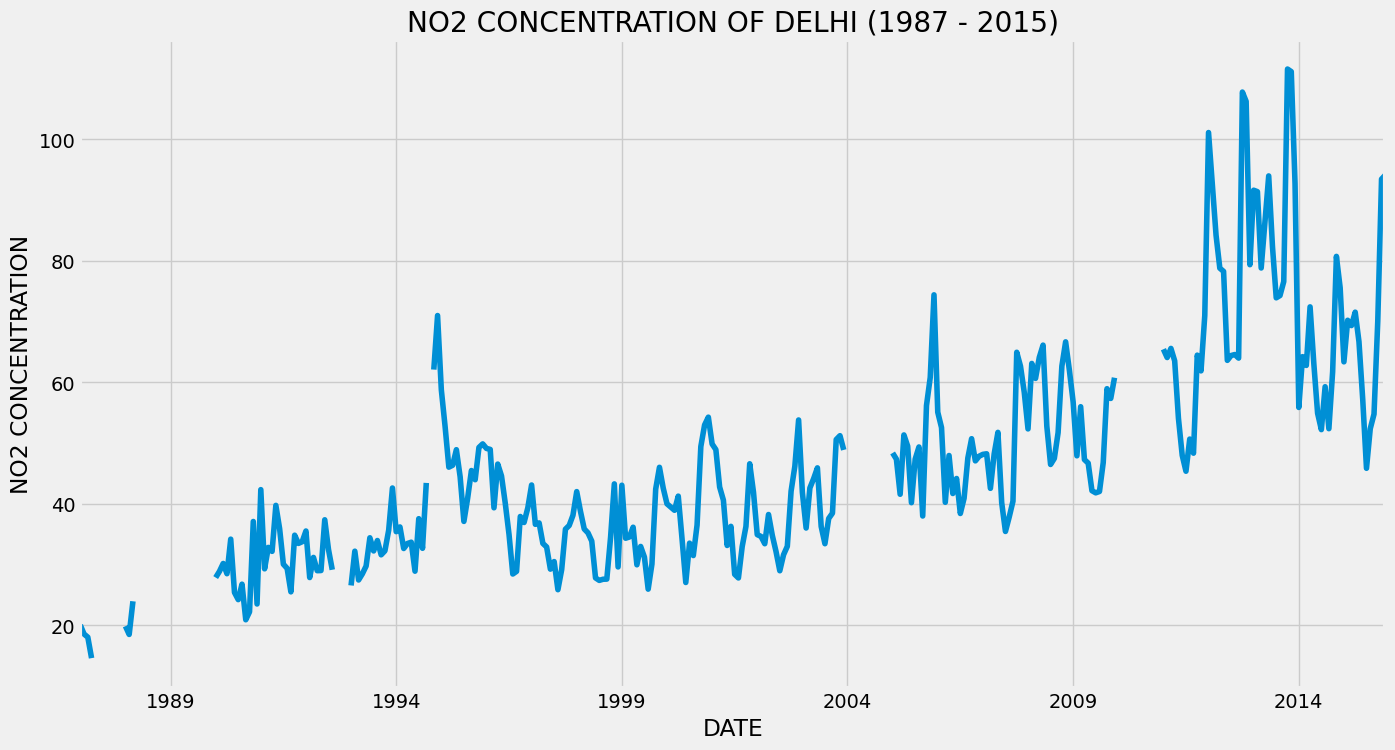

In [11]:
delhi_data_no2.plot(figsize=[15, 8])
plt.xlabel("DATE")
plt.ylabel("NO2 CONCENTRATION")
plt.title("NO2 CONCENTRATION OF DELHI (1987 - 2015)")
plt.show()

In [23]:
mod = sm.tsa.statespace.SARIMAX(delhi_data_no2,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6840      0.053     12.814      0.000       0.579       0.789
ma.L1         -0.9516      0.020    -47.018      0.000      -0.991      -0.912
ma.S.L12       0.4758      0.066      7.225      0.000       0.347       0.605
sigma2        49.5014      2.805     17.649      0.000      44.004      54.999


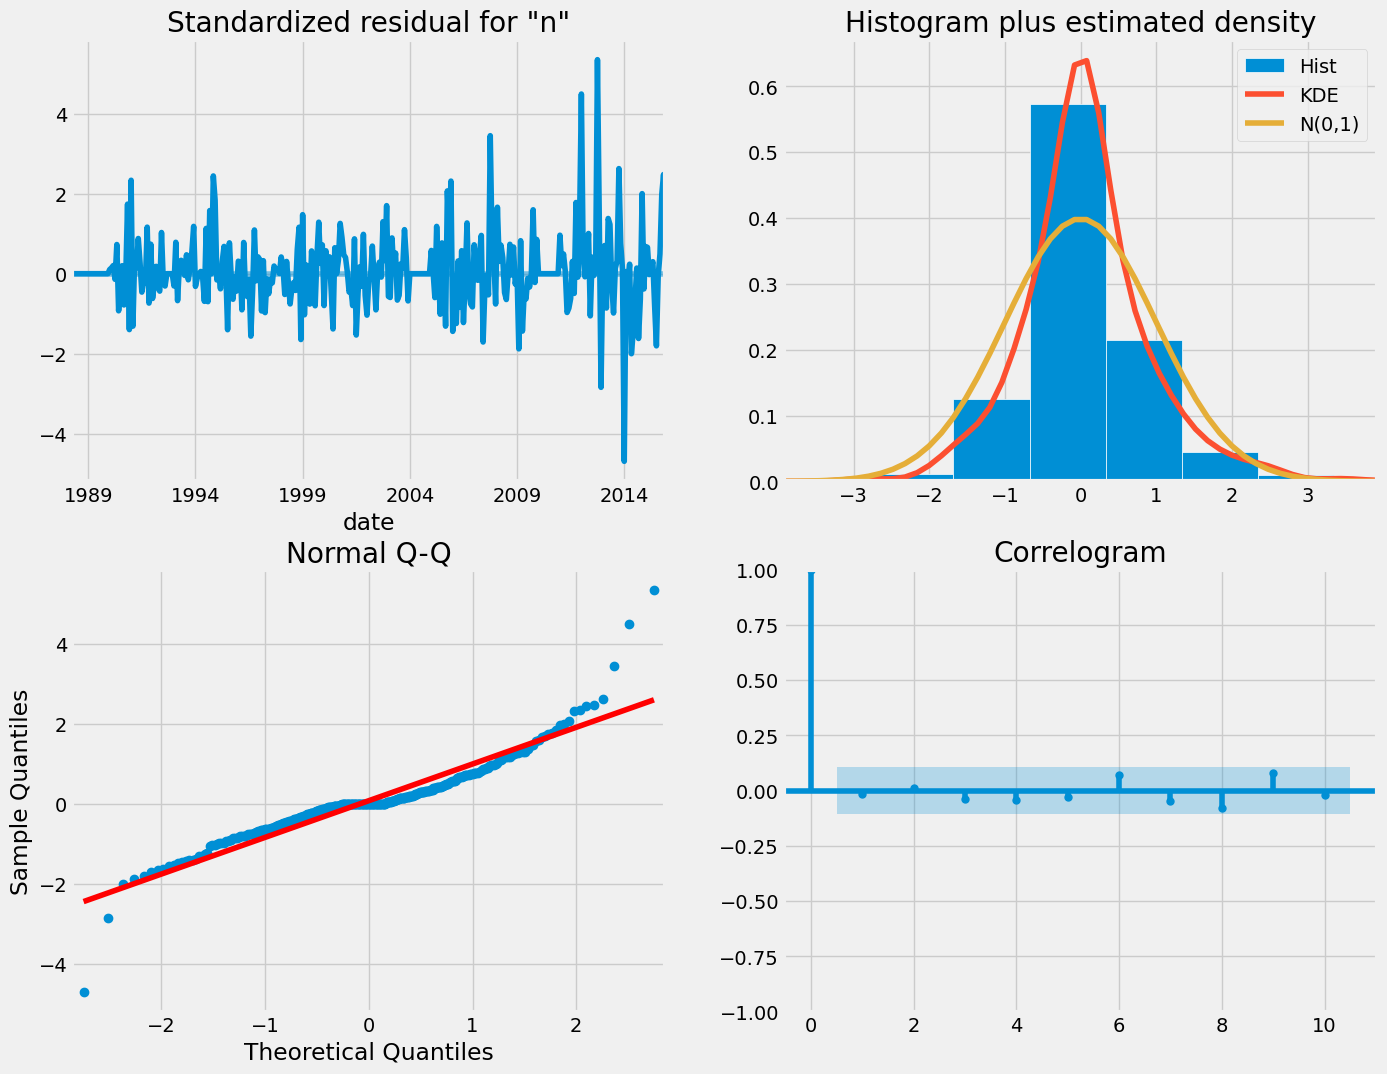

In [24]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [25]:
pred = results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=False)
pred_ci = pred.conf_int()

The Root Mean Squared Error of our prediction is 7.48
2016-01-01    89.574121
2016-02-01    86.496202
2016-03-01    82.216167
2016-04-01    79.880521
2016-05-01    78.795158
2016-06-01    74.418805
2016-07-01    67.930563
2016-08-01    69.074757
2016-09-01    71.672761
2016-10-01    78.511166
2016-11-01    85.180874
2016-12-01    86.088896
2017-01-01    82.664778
2017-02-01    80.322554
2017-03-01    78.720387
2017-04-01    77.624446
2017-05-01    76.874782
2017-06-01    76.361984
2017-07-01    76.011211
2017-08-01    75.771270
2017-09-01    75.607141
2017-10-01    75.494871
2017-11-01    75.418074
2017-12-01    75.365542
2018-01-01    75.329608
2018-02-01    75.305028
2018-03-01    75.288214
2018-04-01    75.276713
2018-05-01    75.268846
2018-06-01    75.263465
Freq: MS, Name: predicted_mean, dtype: float64


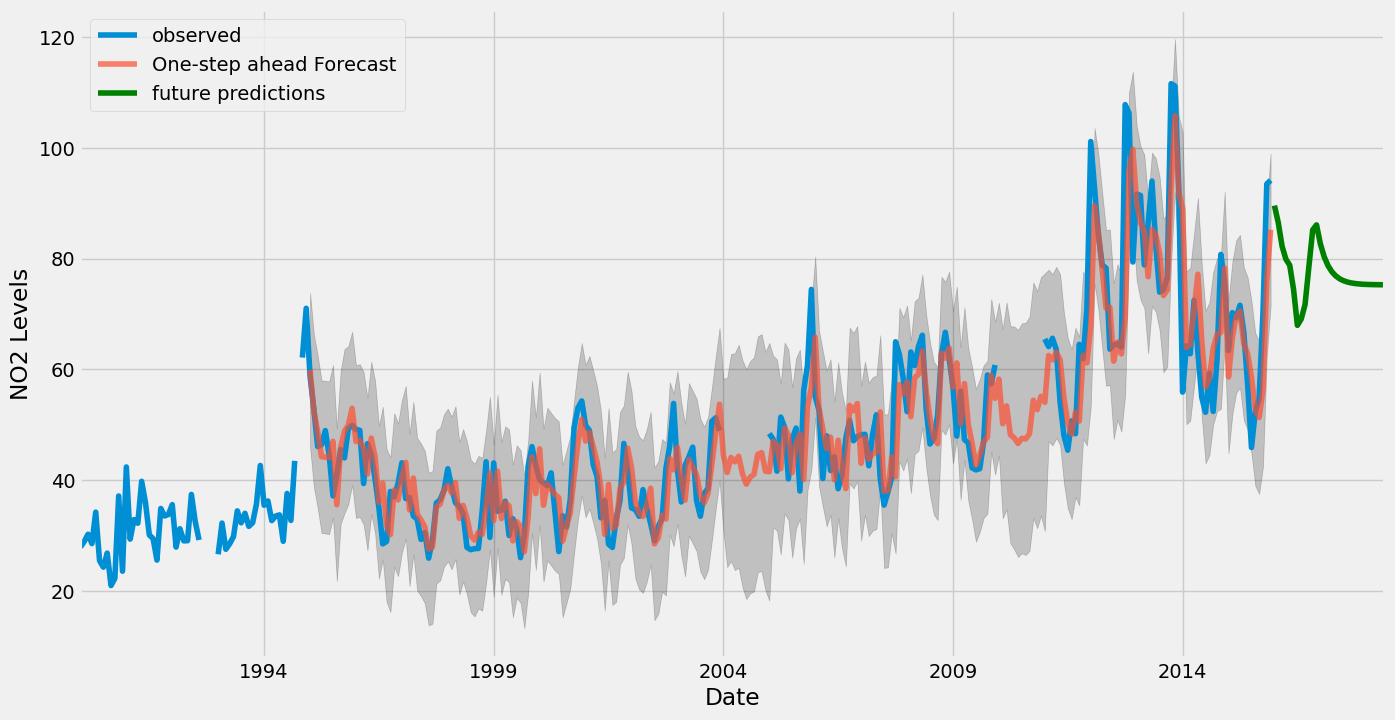

In [26]:
ax = delhi_data_no2['1990':].plot(figsize=[15, 8], label='observed')
pred.predicted_mean.plot(figsize=[15, 8], ax=ax, label='One-step ahead Forecast', alpha=.7)


ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('NO2 Levels')
plt.legend()

delhi_data_no2_forecasted = pred.predicted_mean
delhi_data_no2_truth = delhi_data_no2['1995-01-01':]

# Compute the mean square error
rmse = (((delhi_data_no2_forecasted - delhi_data_no2_truth) ** 2).mean()) ** 0.5
print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 2)))

forecast = results.forecast(30)
print(forecast)
forecast.plot(figsize=[15, 8], color='green', label='future predictions')
plt.legend()
plt.show()

#### Find Parameters for SariMAX model

In [1]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sm as sm
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np
import math
import itertools

In [10]:
color = sns.color_palette()
print('Please wait. Importing data...')
df = pd.read_csv("data.csv", encoding = "ISO-8859-1")
print('import completed.')

def date_parser(x):
    return datetime.strptime(x, '%Y-%m')

Please wait. Importing data...
import completed.


C:\Users\deepe\AppData\Local\Temp\ipykernel_25328\3246287524.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding = "ISO-8859-1")


In [8]:
delhi_data = df[df.state == 'Delhi'].sort_values(by='date', ascending=0)
delhi_data_no2 = delhi_data[['date', 'no2']]
delhi_data_no2['no2'] = delhi_data_no2['no2'].map(lambda x: str(x))
delhi_data_no2 = delhi_data_no2[delhi_data_no2.no2 != 'nan']
delhi_data_no2['no2'] = pd.to_numeric(delhi_data_no2['no2'])
delhi_data_no2['date'] = delhi_data_no2['date'].map(lambda x: str(x)[:7])
delhi_data_no2['date'] = delhi_data_no2['date'].map(lambda x: date_parser(x))
delhi_data_no2.index = delhi_data_no2['date']


delhi_data_no2 = delhi_data_no2.fillna(delhi_data_no2.bfill())
delhi_data_no2 = delhi_data_no2['no2'].resample('MS').mean()

C:\Users\deepe\AppData\Local\Temp\ipykernel_25328\3411656737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data_no2['no2'] = delhi_data_no2['no2'].map(lambda x: str(x))


In [9]:
delhi_data_no2

,date,no2
date,,
2015-12-01,2015-12-01,44.0
2015-12-01,2015-12-01,49.0
2015-12-01,2015-12-01,71.0
2015-12-01,2015-12-01,161.0
2015-12-01,2015-12-01,63.0
...,...,...
1987-01-01,1987-01-01,20.7
1987-01-01,1987-01-01,8.2
1987-01-01,1987-01-01,13.2


In [20]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
    
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

In [21]:
df_aic = pd.DataFrame(columns=['aic', 'param', 'seasonal_param'])
i = 0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(delhi_data_no2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            df_aic.loc[i] = [results.aic, param, param_seasonal]
            i+=1
        except:
            continue

df_aic = df_aic.sort_values(by='aic', ascending=1)
print(df_aic)

            aic      param seasonal_param
57  1931.435264  (1, 1, 1)  (0, 0, 1, 12)
61  1931.966143  (1, 1, 1)  (1, 0, 1, 12)
60  1950.026771  (1, 1, 1)  (1, 0, 0, 12)
29  1956.331832  (0, 1, 1)  (1, 0, 1, 12)
25  1956.685700  (0, 1, 1)  (0, 0, 1, 12)
..          ...        ...            ...
4   2291.135913  (0, 0, 0)  (1, 0, 0, 12)
9   2501.724942  (0, 0, 1)  (0, 0, 1, 12)
8   2756.762675  (0, 0, 1)  (0, 0, 0, 12)
1   2786.397527  (0, 0, 0)  (0, 0, 1, 12)
0   3082.006012  (0, 0, 0)  (0, 0, 0, 12)

[64 rows x 3 columns]


In [22]:
df_aic

,aic,param,seasonal_param
57,1931.435264,"(1, 1, 1)","(0, 0, 1, 12)"
61,1931.966143,"(1, 1, 1)","(1, 0, 1, 12)"
60,1950.026771,"(1, 1, 1)","(1, 0, 0, 12)"
29,1956.331832,"(0, 1, 1)","(1, 0, 1, 12)"
25,1956.685700,"(0, 1, 1)","(0, 0, 1, 12)"
...,...,...,...
4,2291.135913,"(0, 0, 0)","(1, 0, 0, 12)"
9,2501.724942,"(0, 0, 1)","(0, 0, 1, 12)"
8,2756.762675,"(0, 0, 1)","(0, 0, 0, 12)"
1,2786.397527,"(0, 0, 0)","(0, 0, 1, 12)"


#### Prophet CO2

In [29]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [30]:


plt.style.use('fivethirtyeight')

print('Please wait. Importing data...')
data = sm.datasets.co2.load_pandas()
co2 = data.data
print('import completed.')
co2['ds'] = co2.index
co2.rename(columns={'co2': 'y'}, inplace=True)

co2.dropna(inplace=True)

co2 = co2['1987-01-01':]

old_dates = pd.DataFrame(co2['ds'])
co2.tail()


Please wait. Importing data...
import completed.


,y,ds
2001-12-01,370.3,2001-12-01
2001-12-08,370.8,2001-12-08
2001-12-15,371.2,2001-12-15
2001-12-22,371.3,2001-12-22
2001-12-29,371.5,2001-12-29


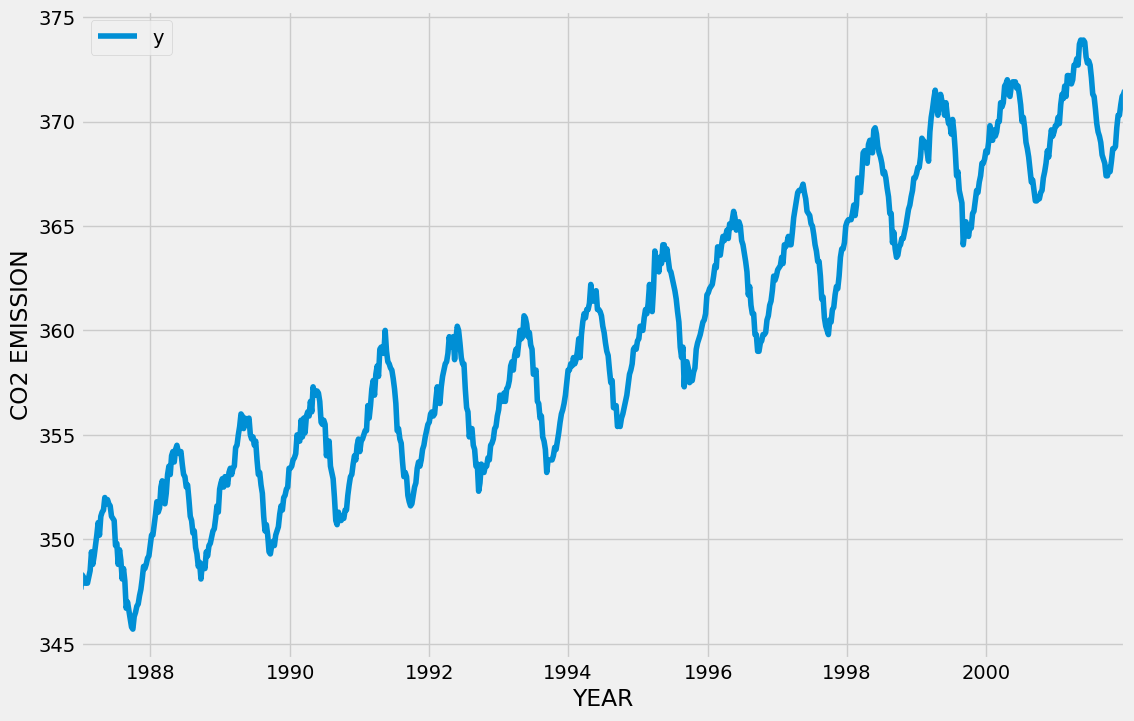

In [31]:
#exit(0)

ax = co2.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('CO2 EMISSION')
ax.set_xlabel('YEAR')
plt.show()

In [35]:


my_model = Prophet()
my_model.fit(co2)

future_dates = my_model.make_future_dataframe(periods=365*20, include_history=True)


forecast = my_model.predict(future_dates)
old_data_forcast = my_model.predict(old_dates)

rmse = mean_squared_error(co2.y, old_data_forcast.yhat) ** 0.5

print("mean squared error - ", round(rmse, 2))
#print(r2_score(co2.y, old_data_forcast.yhat))

18:18:16 - cmdstanpy - INFO - Chain [1] start processing
18:18:16 - cmdstanpy - INFO - Chain [1] done processing


mean squared error -  0.36


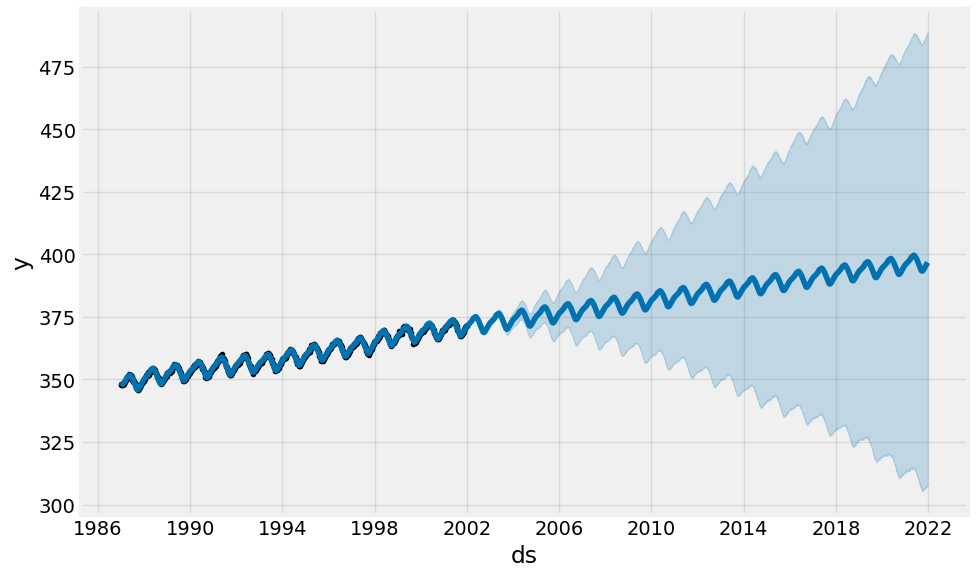

In [36]:
my_model.plot(forecast, uncertainty=True)
plt.show()

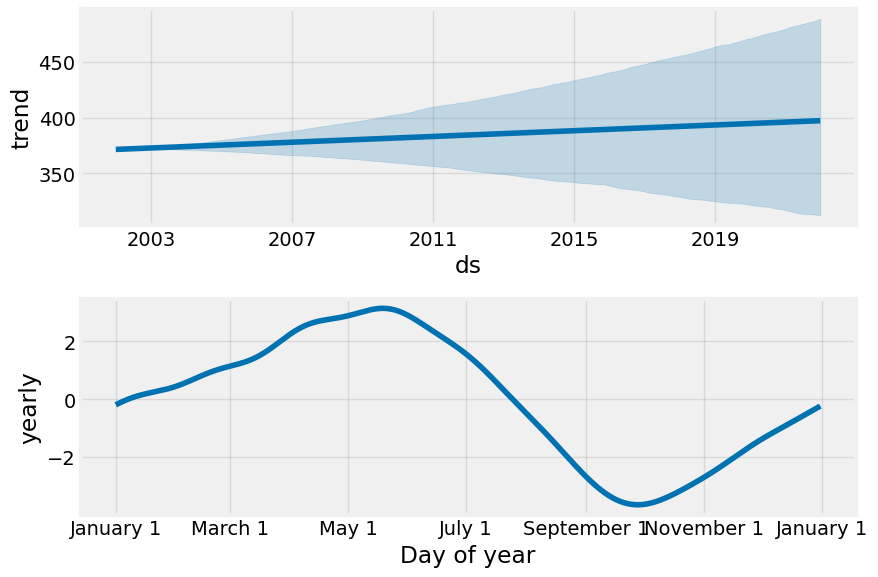

In [34]:

my_model.plot_components(forecast)
plt.show()

In [29]:
!python prophet_no2.py

Importing plotly failed. Interactive plots will not work.
Please wait. Importing data...
/mnt/c/Users/deepe/iTek-workshop/Air-Quality-Prediction/prophet_no2.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding = "ISO-8859-1")
import completed.
/mnt/c/Users/deepe/iTek-workshop/Air-Quality-Prediction/prophet_no2.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data_no2['no2'] = delhi_data_no2['no2'].map(lambda x: str(x))
              ds
65883 1987-01-12
65875 1987-01-11
65869 1987-01-10
65870 1987-01-10
65861 1987-01-09
Figure(1500x800)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdst

Please wait. Importing data...


/tmp/ipykernel_1746/17487385.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding = "ISO-8859-1")
/tmp/ipykernel_1746/17487385.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data_no2['no2'] = delhi_data_no2['no2'].map(lambda x: str(x))


import completed.
              ds
65883 1987-01-12
65875 1987-01-11
65869 1987-01-10
65870 1987-01-10
65861 1987-01-09


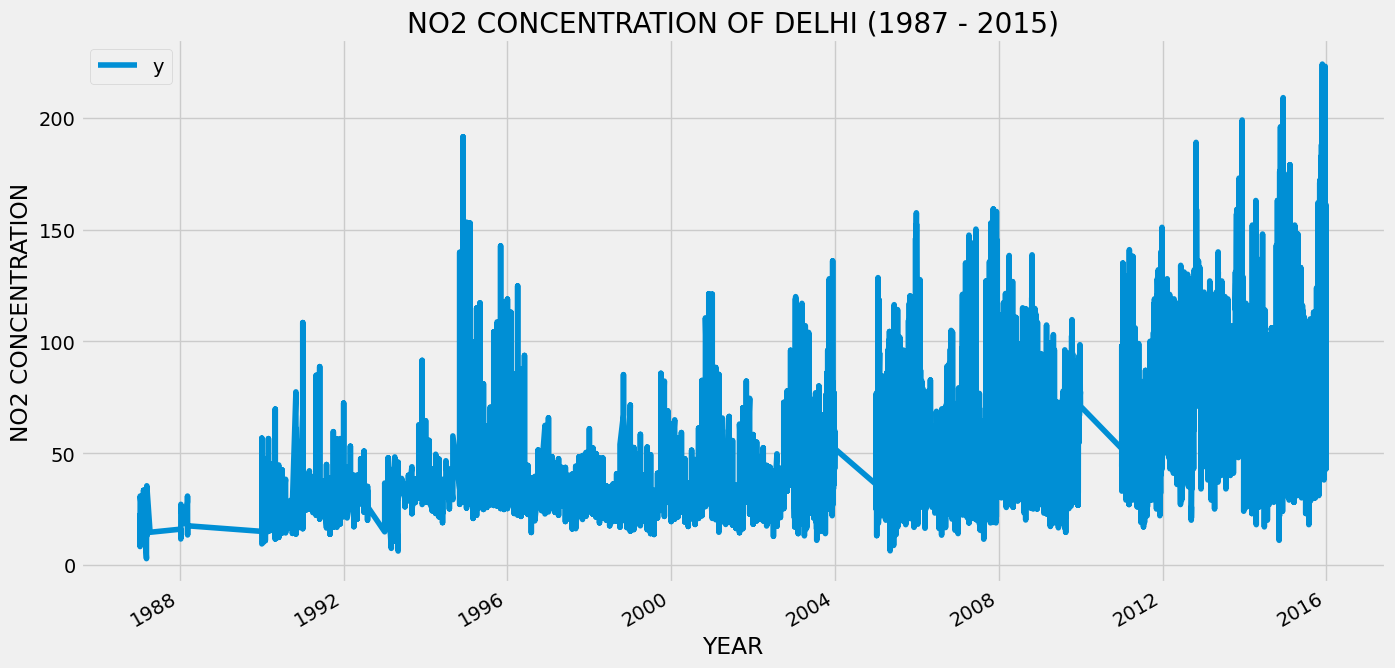

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


mean squared error -  34.88


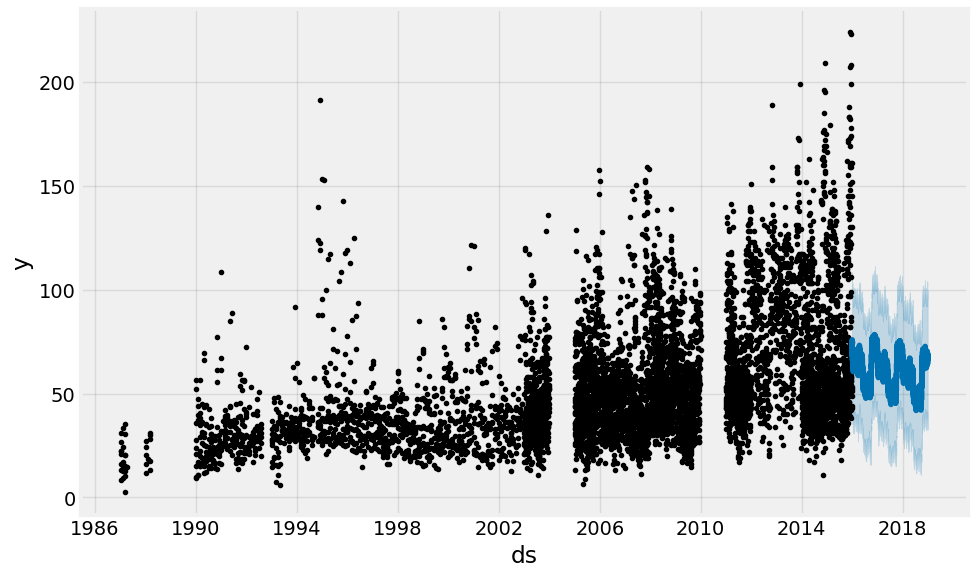

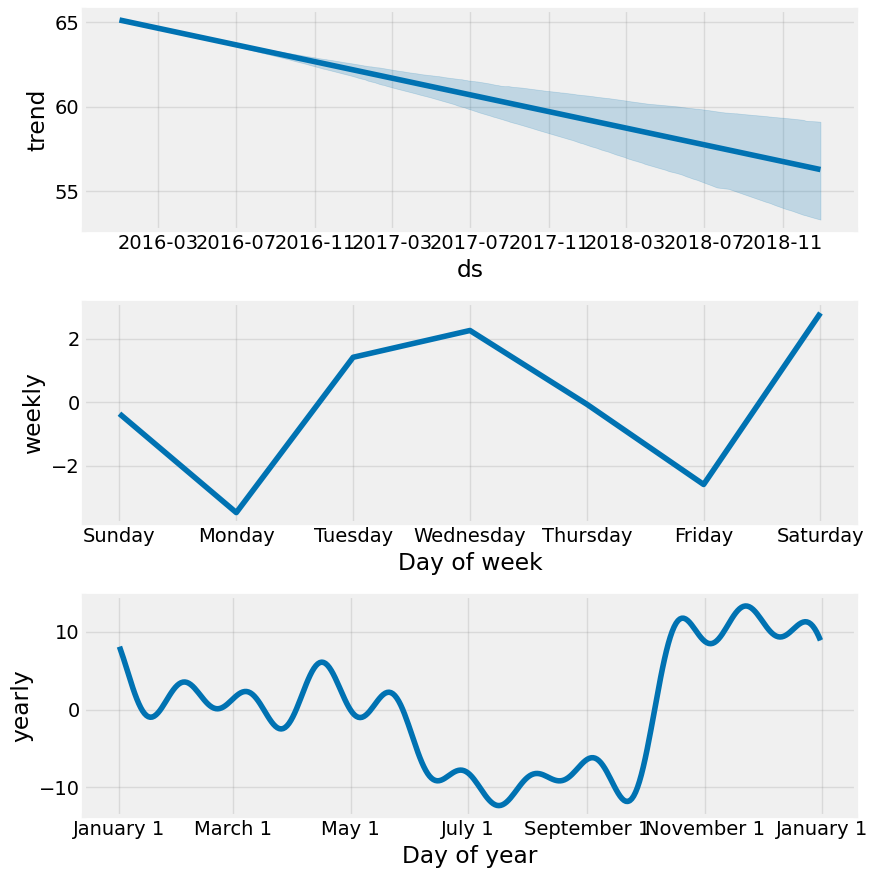

In [30]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('fivethirtyeight')

print('Please wait. Importing data...')
df = pd.read_csv("data.csv", encoding = "ISO-8859-1")
print('import completed.')

def date_parser(x):
    return datetime.strptime(x, '%Y-%m-%d')


delhi_data = df[df.state == 'Delhi'].sort_values(by='date', ascending=0)
delhi_data_no2 = delhi_data[['date', 'no2']]
delhi_data_no2['no2'] = delhi_data_no2['no2'].map(lambda x: str(x))
delhi_data_no2 = delhi_data_no2[delhi_data_no2.no2 != 'nan']
delhi_data_no2['no2'] = pd.to_numeric(delhi_data_no2['no2'])
delhi_data_no2['date'] = delhi_data_no2['date'].map(lambda x: str(x)[:10])
delhi_data_no2['date'] = delhi_data_no2['date'].map(lambda x: date_parser(x))



delhi_data_no2.rename(columns={'date': 'ds', 'no2': 'y'}, inplace=True)


delhi_data_no2.dropna(inplace=True)


old_dates = pd.DataFrame(delhi_data_no2['ds'])

print(old_dates.tail())


#exit(0)

ax = delhi_data_no2.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('NO2 CONCENTRATION')
ax.set_xlabel('YEAR')
plt.title("NO2 CONCENTRATION OF DELHI (1987 - 2015)")
plt.show()

my_model = Prophet()
my_model.fit(delhi_data_no2)

future_dates = my_model.make_future_dataframe(periods=365*3, include_history=False)


forecast = my_model.predict(future_dates)
old_data_forcast = my_model.predict(old_dates)

rmse = mean_squared_error(delhi_data_no2.y, old_data_forcast.yhat) ** 0.5

print("mean squared error - ", round(rmse, 2))
#print(r2_score(delhi_data_no2.y, old_data_forcast.yhat))

my_model.plot(forecast, uncertainty=True)
plt.show()
my_model.plot_components(forecast)
plt.show()